In [1]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-

from os import path
from acoular import __file__ as bpath, MicGeom, WNoiseGenerator, PointSource,\
 Mixer, WriteH5, TimeSamples, PowerSpectra, RectGrid, SteeringVector,\
 BeamformerBase, BeamformerFunctional, BeamformerMusic, L_p
from pylab import figure, plot, axis, imshow, colorbar, show

# set up the parameters
sfreq = 51200 
duration = 1
nsamples = duration*sfreq
micgeofile = 'array_9.xml'
h5savefile = 'test_signal_9_2source.h5'

# generate test data, in real life this would come from an array measurement
mg = MicGeom( from_file=micgeofile )
n1 = WNoiseGenerator( sample_freq=sfreq, numsamples=nsamples, seed=1 )
n2 = WNoiseGenerator( sample_freq=sfreq, numsamples=nsamples, seed=2 )
n3 = WNoiseGenerator( sample_freq=sfreq, numsamples=nsamples, seed=3, rms=0.5 )
p1 = PointSource( signal=n1, mics=mg,  loc=(0,2,0.5) )
p2 = PointSource( signal=n2, mics=mg,  loc=(4,2,0.5) )
p3 = PointSource( signal=n3, mics=mg,  loc=(2,0,1.8) )
pa = Mixer( source=p1, sources=[p2] )
wh5 = WriteH5( source=pa, name=h5savefile )
wh5.save()

[('test_signal_9_cache.h5', 1)]
[('test_signal_9_cache.h5', 2)]


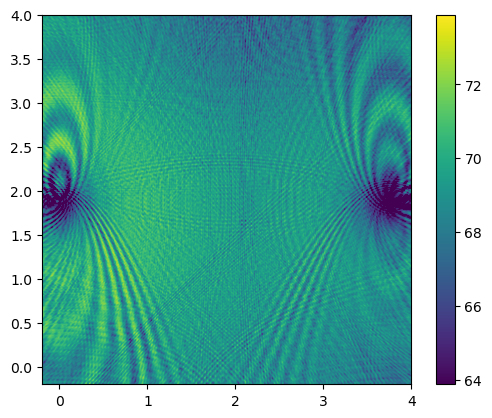

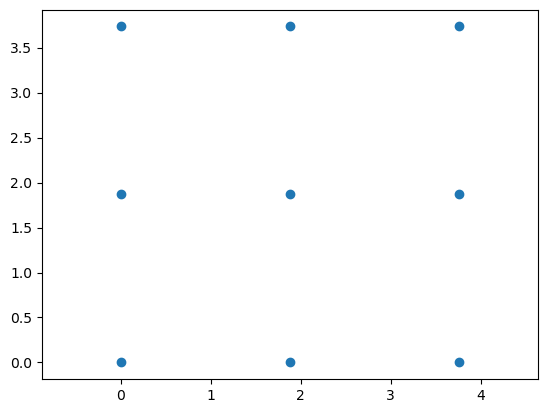

In [3]:
# analyze the data and generate map

ts = TimeSamples( name=h5savefile )
ps = PowerSpectra( time_data=ts, block_size=1024, window='Hanning' )

rg = RectGrid( x_min=-0.2, x_max=4,
                       y_min=-0.2, y_max=4,
                       z=0.5, increment=0.01 )
st = SteeringVector( grid=rg, mics=mg, steer_type='true location', ref=[1.88,1.87,1.68] )
bb = BeamformerBase( freq_data=ps, steer=st )
pm = bb.synthetic(8000,3)
Lm = L_p( pm )

# show map
imshow( Lm.T, origin='lower', vmin=Lm.max()-10, extent=rg.extend(), \
interpolation='bicubic')
colorbar()

# plot microphone geometry
figure(2)
plot(mg.mpos[0],mg.mpos[1],'o')
axis('equal')

show()